# Dim reduction and clustering of scvi latent space 

In [ ]:
library_load <- suppressMessages(
    list(
        # Seurat 
        library(Seurat),

        # Data 
        library(dplyr), 
        
        # Plot
        library(ggplot2), 
        library(patchwork)
    )
)

In [ ]:
# Set working directory to project root
setwd("/research/peer/fdeckert/FD20200109SPLENO")

In [ ]:
# Source files
source("plotting_global.R")
source("bin/SeuratQC.R")

In [ ]:
options(warn=-1)

# Parameter settings

In [ ]:
# Plotting Theme
ggplot2::theme_set(theme_global_set()) # From project global source()

# Set assay 

In [ ]:
assay <- "SCVI_hvg_conc"
reduction <- "latent_hvg_conc"

In [ ]:
cluster <- paste0(assay, "_snn_res.0.8")
graph <- paste0(assay, "_snn")

# Import scvi as Seurat Object

In [ ]:
setwd("/research/peer/fdeckert/FD20200109SPLENO")
source("bin/SeuratFacility.R")
so <- dir2seurat(dir="data/object/seurat", assays=assay)

# Latent space dimensional reduction and clustering

In [ ]:
# Find clusters, then run UMAP, and visualize
DefaultAssay(so) <- assay
so <- FindNeighbors(so, dims=1:30, reduction=reduction, assay=assay, graph.name=graph, verbose=FALSE)
so <- FindClusters(so, resolution=0.8, graph.name=graph, verbose=FALSE)
so <- RunUMAP(so, reduction=reduction, graph=graph, verbose=FALSE)

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
dplot_1(so, cluster=cluster)

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
fplot_1(so)

# Scaled noramlized counts dimensional reduction and clustering

In [24]:
# Find clusters, then run UMAP, and visualize
DefaultAssay(so) <- assay
so <- ScaleData(so, assay=assay, do.center=TRUE, do.scale=TRUE)
if(nrow(so) > 3000) {
    
    so <- FindVariableFeatures(so, nfeatures=3000)
    
} else {
    
    VariableFeatures(so) <- rownames(so)
    
}
so <- RunPCA(so, assay=assay, npcs=100, verbose=FALSE)
so <- FindNeighbors(so, assay=assay, dims=1:100, verbose=FALSE)
so <- FindClusters(so, assay=assay, verbose=FALSE)
so <- RunUMAP(so, assay=assay, dims=1:100, verbose=FALSE)

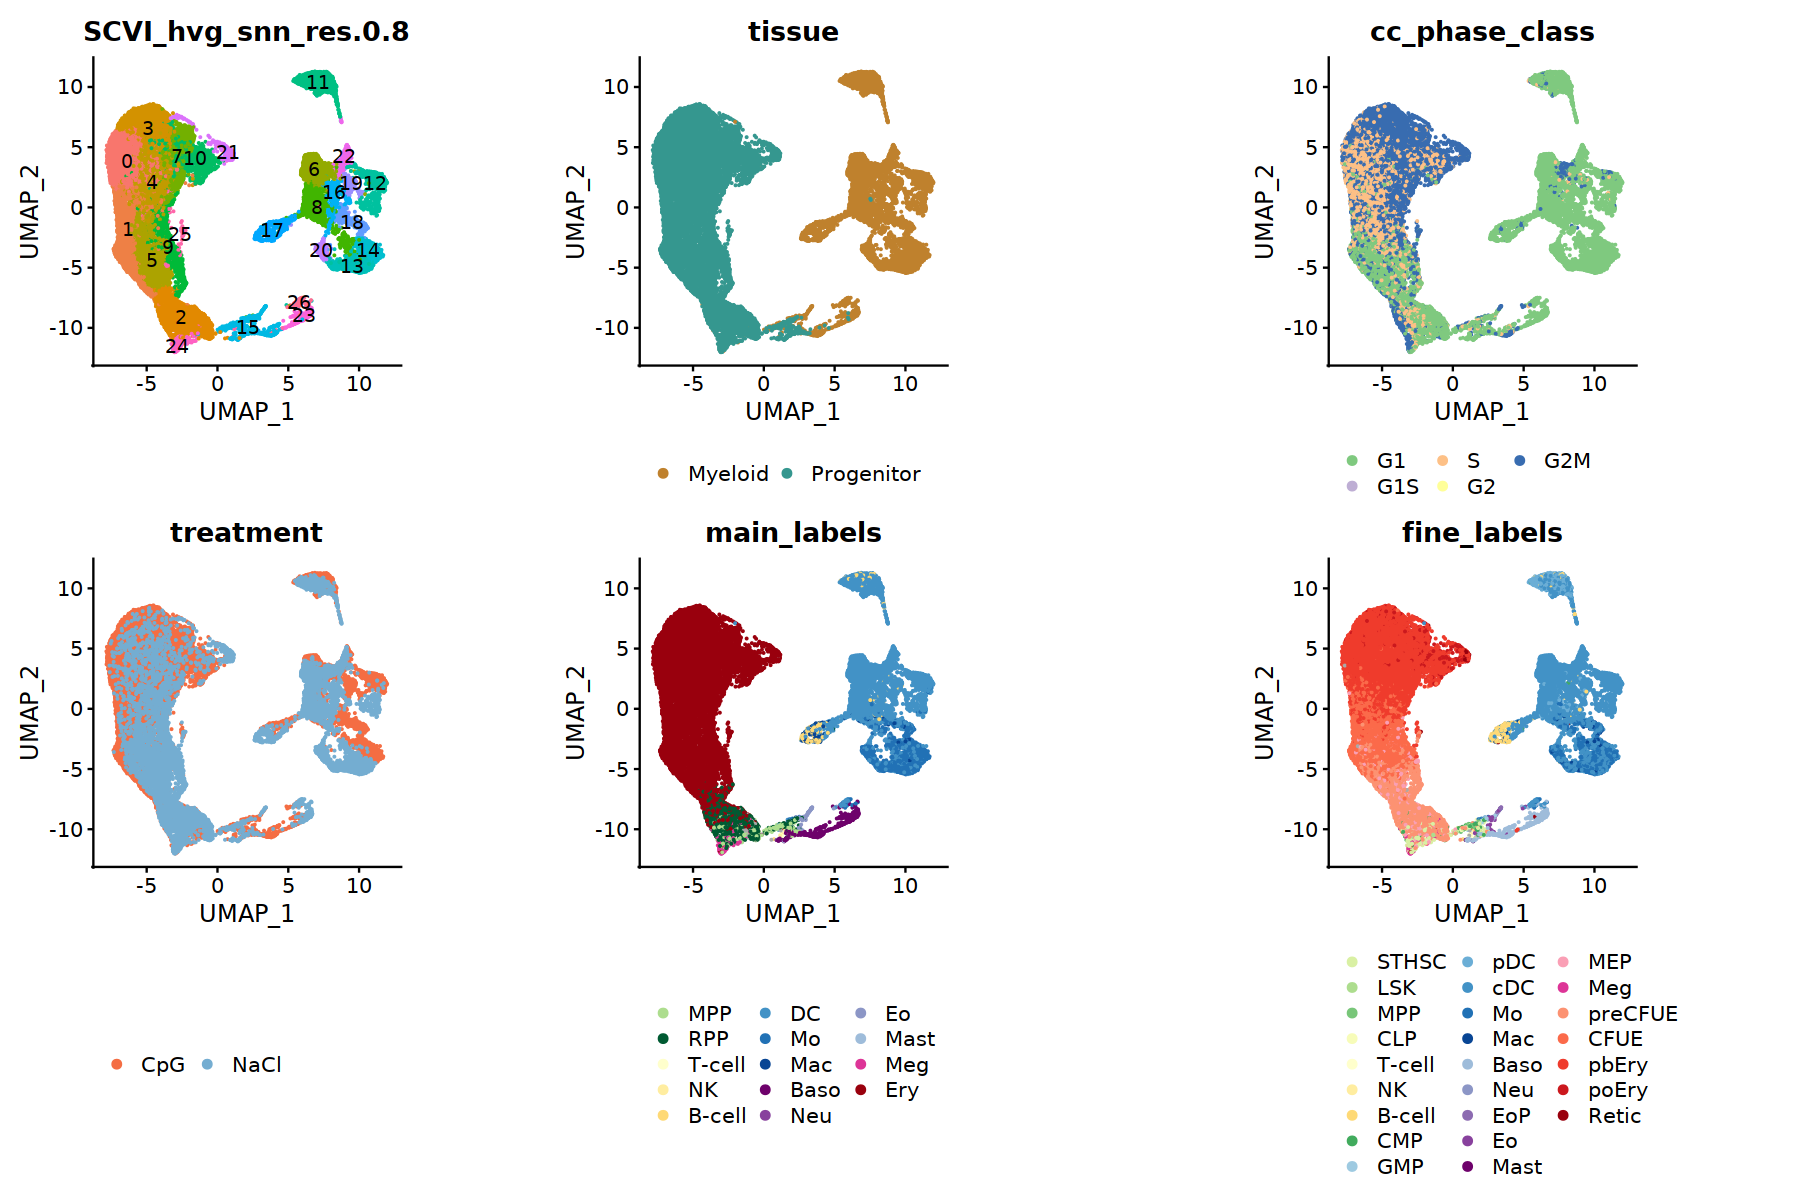

In [28]:
options(repr.plot.width=15, repr.plot.height=10)
dplot_1(so, cluster=cluster)

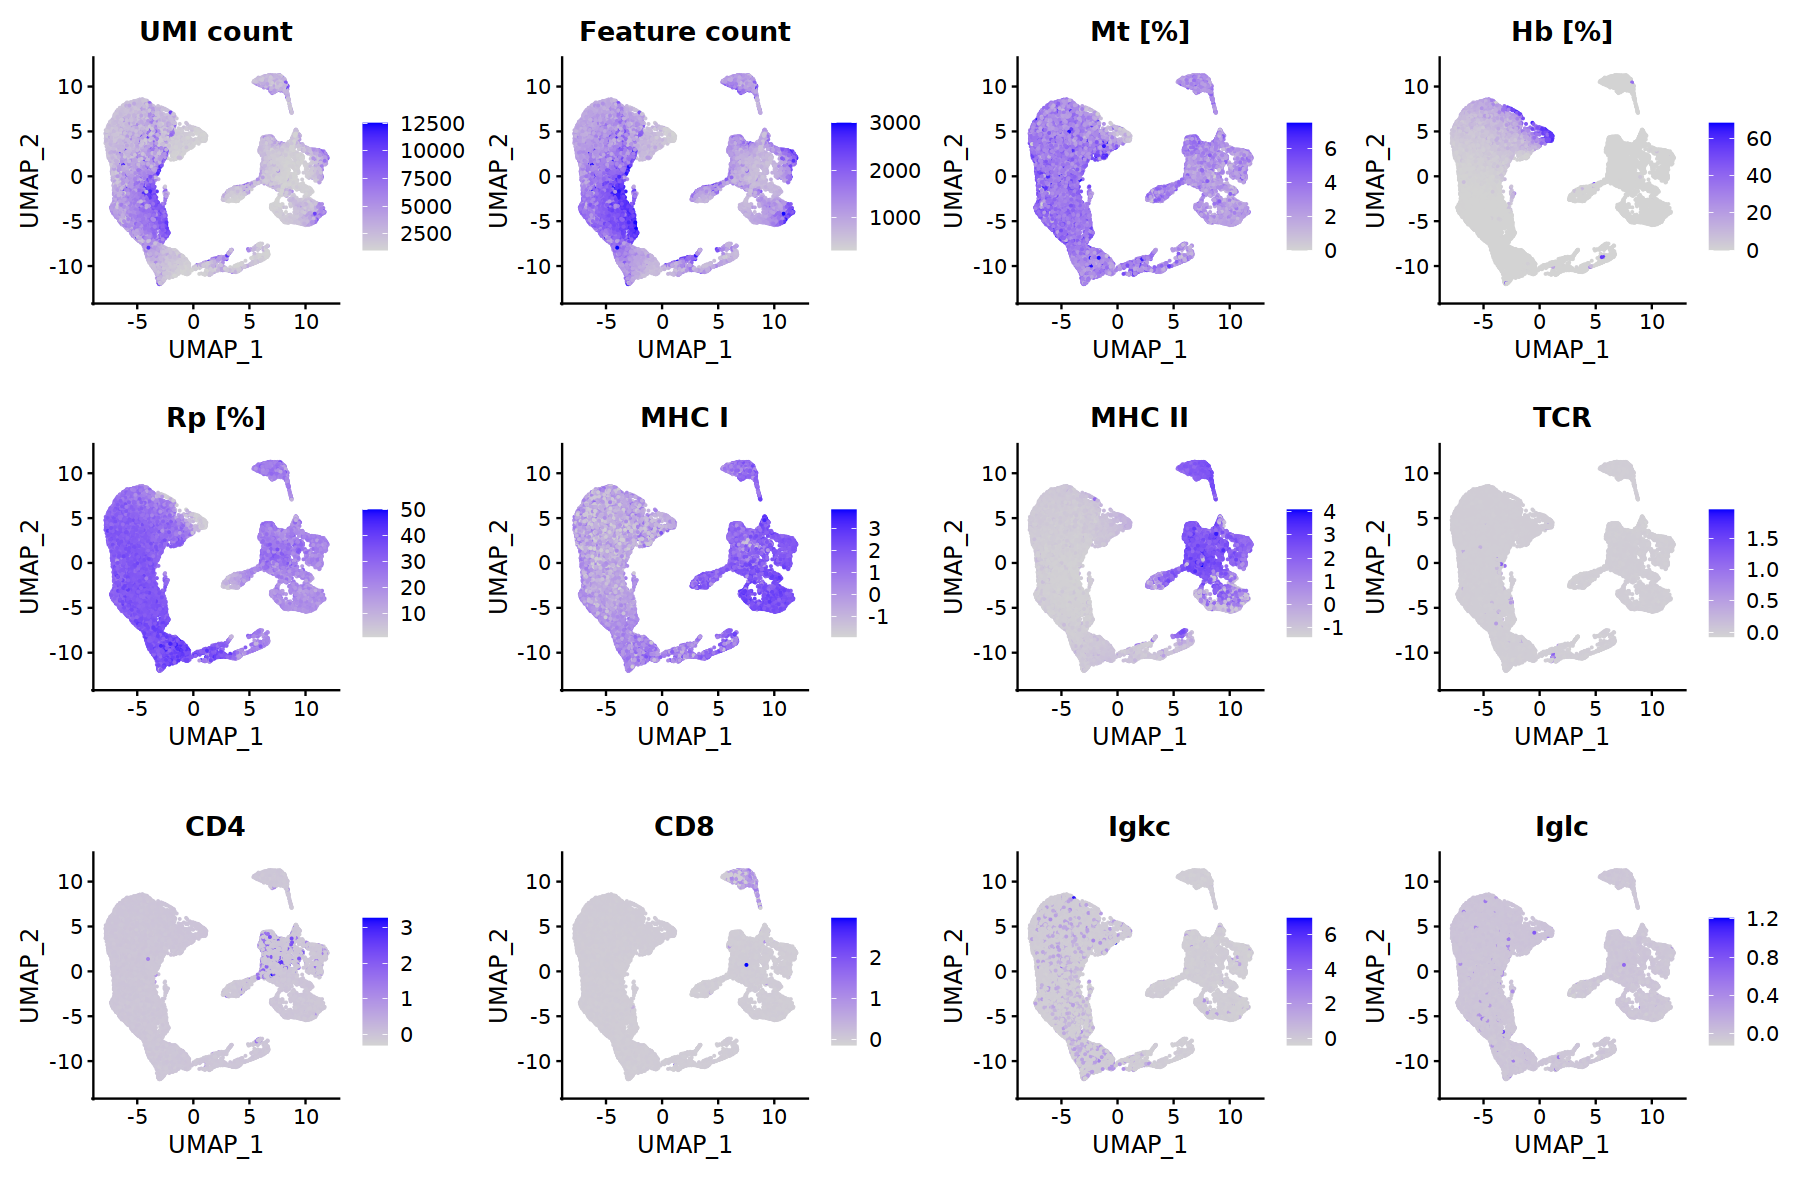

In [29]:
options(repr.plot.width=15, repr.plot.height=10)
fplot_1(so)